libraries

In [1]:
import numpy as np 
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import tree


for starting the project we importing the library and the package that we need and I must point out that each of these packages has a specific reason, which we will talk about later.

before start the procesing of our data we should mention some point about our task in these pandasProfiling:
file:///Users/homabarghamadi/Desktop/Pandas%20Profiling%20Report.html

 Data Preprocessing

In [2]:
fdataset= pd.read_excel(r"D:\DS-SBU\machine learning\project\data\qm8-v.xlsx" )
fdataset.head()

BalabanJ   BertzCT          Chi0         Chi0n         Chi0v          Chi1  \
0  0.000020  0.000577  3.875255e-15  2.722966e-11  1.025154e-07  4.102548e-13   
1  0.000020  0.000577  3.875255e-15  2.722966e-11  1.025154e-07  4.102548e-13   
2  0.000020  0.000577  3.875255e-15  2.722966e-11  1.025154e-07  4.102548e-13   
3  0.974937  0.000625  1.574798e-06  2.191668e-09  2.296717e-07  1.101184e-06   
4  0.974937  0.000646  1.574798e-06  7.501717e-11  1.174156e-07  1.101184e-06   

          Chi1n     Chi1v     Chi2n         Chi2v  ...    fr_sulfone  \
0  1.635214e-11  0.000019  0.000001  2.209078e-07  ...  5.766101e-14   
1  1.635214e-11  0.000019  0.000001  2.209078e-07  ...  5.766101e-14   
2  1.635214e-11  0.000019  0.000001  2.209078e-07  ...  5.766101e-14   
3  1.498512e-07  0.000038  0.000001  2.209078e-07  ...  5.766101e-14   
4  5.282567e-08  0.000033  0.000001  2.209078e-07  ...  5.766101e-14   

   fr_term_acetylene  fr_tetrazole  fr_thiazole   fr_thiocyan  fr_thiophene  \
0       2.957989e-11      0.168378      0.16738  1.481515e-18  2.324150e-16   
1       2.957989e-11      0.168378      0.16738  1.481515e-18  2.324150e-16   
2       2.957989e-11      0.168378      0.16738  1.481515e-18  2.324150e-16   
3       1.000000e+00      0.168378      0.16738  1.481515e-18  2.324150e-16   
4       2.957989e-11      0.168378      0.16738  1.481515e-18  2.324150e-16   

   fr_unbrch_alkane   fr_urea       qed    E1-CC2  
0      4.703598e-08  0.166633  0.187493  0.432952  
1      4.703598e-08  0.166633  0.228070  0.265220  
2      4.703598e-08  0.166633  0.156089  0.286537  
3      4.703598e-08  0.166633  0.160976  0.358629  
4      4.703598e-08  0.166633  0.197878  0.319958  

[5 rows x 201 columns]

Here, we read our data_frame، which we are using pandas package 
using the function (dataset.head()) tell us that we have 200 features and also among our tasks, one of them is here.

In [3]:
#shape
print(fdataset.shape)

(21786, 201)


(dataset.shape) tell us about the overview of our data, the output gives us that we have 21786 rows and also 201 columns.

In [4]:
#type
print(fdataset.dtypes)

BalabanJ            float64
BertzCT             float64
Chi0                float64
Chi0n               float64
Chi0v               float64
                     ...   
fr_thiophene        float64
fr_unbrch_alkane    float64
fr_urea             float64
qed                 float64
E1-CC2              float64
Length: 201, dtype: object


by using (dataset.dtypes) we get the type of each columns that we have float64 in all the dataframe.

In [4]:
#descriptions
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
print(fdataset.describe())

           BalabanJ       BertzCT          Chi0         Chi0n         Chi0v  \
count  21786.000000  21786.000000  2.178600e+04  2.178600e+04  2.178600e+04   
mean       0.882976      0.004175  8.050496e-04  1.265855e-03  8.100724e-04   
std        0.096868      0.002365  3.612261e-04  9.200116e-04  5.719053e-04   
min        0.000020      0.000577  3.875255e-15  2.722966e-11  1.025154e-07   
25%        0.819264      0.002538  5.305247e-04  6.488410e-04  4.292044e-04   
50%        0.900470      0.003618  7.798307e-04  1.032252e-03  6.657789e-04   
75%        0.971167      0.005214  9.651556e-04  1.652190e-03  1.047638e-03   
max        0.997091      0.016801  2.302637e-03  1.144224e-02  7.332096e-03   

               Chi1         Chi1n         Chi1v         Chi2n         Chi2v  \
count  2.178600e+04  2.178600e+04  21786.000000  21786.000000  2.178600e+04   
mean   1.011424e-03  2.935084e-03      0.002240      0.011045  5.785967e-03   
std    2.870503e-04  2.487081e-03      0.001540    

for understand more detail about our data we use (dataset.describe()) that tell us about the count, mean, std, min, max and also Quantities in 25%, 50% and 75% for each columns.
I should mention that we don't have all our data here and for see all of them we can click on text editor.

start to select the feature of our data in two way:
1.VarianceThereshold
2.correlation matrix

In [3]:
# import VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
var_threshold = VarianceThreshold(threshold=0)   # threshold = 0 for constant
  
# fit the data
var_threshold.fit(fdataset)
  
# We can check the variance of different features as
print(var_threshold.variances_)

#transform the data
print(var_threshold.transform(fdataset))
print('*' * 10,"Separator",'*' * 10)
  
# shapes of data before transformed and after transformed
print("Earlier shape of data: ", fdataset.shape)
print("Shape after transformation: ", var_threshold.transform(fdataset).shape)
dataset= pd.DataFrame(var_threshold.transform(fdataset))
header =" BalabanJ	BertzCT	Chi0	Chi0n	Chi0v	Chi1	Chi1n	Chi1v	Chi2n	Chi2v	Chi3n	Chi3v	Chi4n	Chi4v	EState_VSA1	EState_VSA10	EState_VSA2	EState_VSA3	EState_VSA4	EState_VSA5	EState_VSA6	EState_VSA7	EState_VSA8	EState_VSA9	ExactMolWt	FpDensityMorgan1	FpDensityMorgan2	FpDensityMorgan3	FractionCSP3	HallKierAlpha	HeavyAtomCount	HeavyAtomMolWt	Kappa1	Kappa2	Kappa3	LabuteASA	MaxAbsEStateIndex	MaxAbsPartialCharge	MaxEStateIndex	MaxPartialCharge	MinAbsEStateIndex	MinAbsPartialCharge	MinEStateIndex	MinPartialCharge	MolLogP	MolMR	MolWt	NHOHCount	NOCount	NumAliphaticCarbocycles	NumAliphaticHeterocycles	NumAliphaticRings	NumAromaticCarbocycles	NumAromaticHeterocycles	NumAromaticRings	NumHAcceptors	NumHDonors	NumHeteroatoms	NumRotatableBonds	NumSaturatedCarbocycles	NumSaturatedHeterocycles	NumSaturatedRings	NumValenceElectrons	PEOE_VSA1	PEOE_VSA10	PEOE_VSA11	PEOE_VSA12	PEOE_VSA13	PEOE_VSA14	PEOE_VSA2	PEOE_VSA3	PEOE_VSA4	PEOE_VSA5	PEOE_VSA6	PEOE_VSA7	PEOE_VSA8	PEOE_VSA9	RingCount	SMR_VSA1	SMR_VSA10	SMR_VSA2	SMR_VSA3	SMR_VSA4	SMR_VSA5	SMR_VSA6	SMR_VSA7	SMR_VSA9	SlogP_VSA1	SlogP_VSA10	SlogP_VSA11	SlogP_VSA2	SlogP_VSA3	SlogP_VSA4	SlogP_VSA5	SlogP_VSA6	SlogP_VSA8	TPSA	VSA_EState8	VSA_EState9	fr_Al_COO	fr_Al_OH	fr_Al_OH_noTert	fr_ArN	fr_Ar_N	fr_Ar_NH	fr_Ar_OH	fr_COO	fr_COO2	fr_C_O	fr_C_O_noCOO	fr_HOCCN	fr_Imine	fr_NH0	fr_NH1	fr_NH2	fr_Ndealkylation1	fr_Ndealkylation2	fr_Nhpyrrole	fr_aldehyde	fr_alkyl_carbamate	fr_alkyl_halide	fr_allylic_oxid	fr_amide	fr_amidine	fr_aniline	fr_aryl_methyl	fr_benzene	fr_bicyclic	fr_epoxide	fr_ester	fr_ether	fr_furan	fr_guanido	fr_halogen	fr_imidazole	fr_imide	fr_ketone	fr_ketone_Topliss	fr_lactam	fr_lactone	fr_methoxy	fr_morpholine	fr_nitrile	fr_nitro	fr_oxazole	fr_oxime	fr_para_hydroxylation	fr_phenol	fr_phenol_noOrthoHbond	fr_piperdine	fr_piperzine	fr_priamide	fr_pyridine	fr_quatN	fr_term_acetylene	fr_tetrazole	fr_unbrch_alkane	fr_urea	qed	E1-CC2"
dataset.columns= header.split()

[9.38302459e-03 5.59291643e-06 1.30478305e-07 8.46382503e-07
 3.27060616e-07 8.23940922e-08 6.18528732e-06 2.37210978e-06
 2.41490380e-04 7.87416315e-05 3.45803541e-03 1.54454800e-03
 9.60294389e-03 5.25256929e-03 6.92744251e-02 2.50567182e-02
 0.00000000e+00 2.48258760e-02 2.50054481e-02 3.37604862e-02
 1.33588604e-01 4.65894752e-02 5.24749267e-02 3.78329333e-02
 5.91526833e-02 2.79182178e-08 2.85194623e-02 5.61983756e-02
 1.12923858e-01 9.39840905e-02 5.88831095e-04 5.20655136e-08
 3.40259016e-08 0.00000000e+00 1.33014063e-06 7.36445075e-04
 2.13606923e-02 5.28380166e-08 7.45644278e-04 3.95344993e-02
 7.45644278e-04 6.74446494e-02 7.90546380e-02 6.52254310e-02
 4.36015013e-02 3.84131924e-02 3.02107357e-03 2.35917689e-07
 2.80064499e-08 7.49405302e-02 3.38594897e-03 2.39411909e-01
 1.55333004e-01 1.33683089e-01 2.06128832e-04 1.10106844e-01
 1.38379749e-03 7.13118155e-03 7.19151797e-02 2.05648372e-03
 0.00000000e+00 1.72460983e-03 1.89268316e-01 2.36352958e-01
 2.03272509e-01 4.538930

here we use the method Variancethershold that is a simple baseline approach to feature selection. It removes all features which variance doesn't meet some threshold. By default, it removes all zero-variance features or features that have the same value in all samples.
and as we see by using this method our feature reduce to 160 feature

In [4]:
# Create correlation matrix
corr_matrix = dataset.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.98
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features
dataset = dataset.drop(to_drop, axis=1)
print(dataset.shape)

(21786, 137)


for selecting reducing more related feture in our data we use correlation matrix (correlation matrix is simply a table which displays the correlation in variables that demonstrate a linear relationship between each other).  
    after that we creat a triangle of correlation matrix to understand the set of all possible variances and covariances between velocities in the three Cartesian directions, defined for a specified statistical order or moment.
    since the correlation greater than 0.98 show the soladirity between features we can drop one or more of them so by the line 3 of our code we find them and by line four of our code we drop them out from our data and creat a new one.

In [28]:
dataheader = dataset.columns.values.tolist()
features = dataheader[:136]
target = dataheader[136]
X1 = dataset[features].values.reshape(-1, len(features))
Y1 = dataset[target].values

ols_new = LinearRegression()
modelnew = ols_new.fit(X1, Y1)

print(f'intercept : {modelnew.intercept_}' )
print(f'coefficients : {modelnew.coef_}' )



intercept : 0.4612061514893062
coefficients : [-4.43231146e-02 -1.60290425e+00 -7.90371417e+00 -1.85304868e+00
 -4.26465689e+00 -9.02390266e-01  1.64886636e-01  1.63432575e-03
 -2.08663544e-02  1.20159003e-02  9.14360602e-03 -2.23860056e-03
 -1.35622613e-03 -2.89794752e-03 -5.26395525e-03 -1.45429945e-02
 -1.69434483e-02  1.54128687e+01 -1.57699937e-03 -3.94720504e-03
 -4.61763358e-04  2.13367022e-02 -1.53989247e-01 -1.21204649e+02
  6.41451220e+01 -6.50803683e-01  8.51494365e-03 -9.75245865e-03
  1.16343164e+02 -1.80803687e-01 -7.54461958e-04 -1.23364188e-02
 -2.76048218e-03 -1.84399602e-02  2.24178921e-01 -2.05229951e+01
  9.90196382e-03 -2.67790842e-02 -3.88053686e-03  2.30150815e-03
  5.40051982e-03  9.35681634e-02  1.61791419e-02  7.29094451e-03
 -2.57930951e-02  5.14406194e-03  1.94958462e-03 -8.05228175e-03
  4.91161919e-01 -1.54203719e-03 -4.27434626e-03 -1.75674561e-03
 -3.65791801e-03  1.97698765e-04  1.02929278e-02  1.76719855e-02
  9.90278580e-03  6.60372368e-03  3.16673801

for create a LinearRegression we should select our features and our target. the above code do this for us:
    (dataset.columns.values.tolist()) consider the header of our data and varibles features and target show that we have 136 item for our Xi and a y.
according to Multiple linear Regression model (y = ß1X1 + ß2X2 + ....... +ßnXn + ß0) we should find out the matrix of ßi and also ß0:
    for calcute them first of all we shoud change the form of X into one row matrix for multiplication it with y and we call our model (LinearRegression()) and fit it to X and y.
    the print of intercept return us ß0 and the print of coefficients return us ßi.
now we can make our Multiple linear Regression model by them.

In [5]:

# Split-out validation dataset

X = dataset.iloc[:,0:136]
Y = dataset.iloc[:,136]
test_size = 0.2
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model_new = LinearRegression()
model_new.fit(X_train, Y_train)
resultnew = model_new.score(X_test, Y_test)

print(f'accuracy of linear regression on test set is : {resultnew:.2f}')

accuracy of linear regression on test set is : 0.86


after making the model we should calcute the accuracy of it on our train and test data to understand how good is that our model work:
    we split our data by 20% and also choose seed 7 for other user get the same output. by using the code of (train_test_split) in sklearn library and fit our model on train data and reuse it on test data we understand that the accuracy of our model is 86% and i think that's a good one.

In [36]:
#scaled linear regression
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_std, Y, test_size = 0.2, random_state = seed)
lr_std = LinearRegression()
lr_std.fit(x_train, y_train)
y_pred = lr_std.predict(x_test)
print('Accuracy of linear regression on test set with standardized features: {:.2f}'.format(lr_std.score(x_test, y_test)))

Accuracy of linear regression on test set with standardized features: 0.86


as we know the function StandardScaler help us to caling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution. ... The normal distribution is also known as the Gaussian distribution so for making a better model we done that to our data and the equality of accuracy result withe the previouse one show us our dataset already was standard.

In [21]:
#corelation matrix
correlations = dataset.corr(method='pearson')
print(correlations)

#corelation matrix plot
plt.figure(figsize=(200,200))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

                          BalabanJ   BertzCT      Chi0     Chi0n      Chi1  \
BalabanJ                  1.000000  0.237667  0.505513 -0.113292 -0.236773   
BertzCT                   0.237667  1.000000 -0.035071 -0.322754  0.336629   
Chi0                      0.505513 -0.035071  1.000000  0.391068  0.224833   
Chi0n                    -0.113292 -0.322754  0.391068  1.000000  0.160628   
Chi1                     -0.236773  0.336629  0.224833  0.160628  1.000000   
Chi1n                    -0.634651 -0.202234 -0.214169  0.603852  0.327292   
Chi2n                    -0.498087 -0.039854 -0.251224  0.431083  0.121798   
EState_VSA1               0.295289  0.030343  0.367085 -0.208491 -0.151060   
EState_VSA10              0.226434  0.022471  0.275682 -0.208634 -0.084215   
EState_VSA2               0.101707 -0.050325  0.193717 -0.172467 -0.022480   
EState_VSA3              -0.230453 -0.093229 -0.083246 -0.018781  0.146899   
EState_VSA4              -0.462449 -0.121610 -0.293897  0.214619

here we draw a matrix and a plot of correlation that for have them as output we getting a matrix of pearson correlation we use the (dataset.corr(method='pearson')) function.for draw a plot of it we use matplotlib.pyplot library that help us draw diffrent plot. 
if i want explain it to you as we know a correlation matrix is simply a table which displays the correlation. It is best used in variables that demonstrate a linear relationship between each other. coefficients for different variables. and also The numbers of original diameter of the matrix is all 1 cause it is the highest level of correlation that is exist between one variable and itself and also we can see them in our plot as the darkest color 

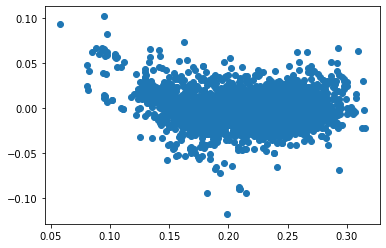

In [38]:
#goodness of fit
residuals = Y_test - y_pred
plt.scatter(y_pred,residuals)
plt.show()

Residuals are nothing but how much your predicted values differ from actual values. So, it's calculated as actual values-predicted values.
so the plot of goodness Y_test with y_prediction show us that the task have stable variance.

C:\Users\helia\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\helia\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


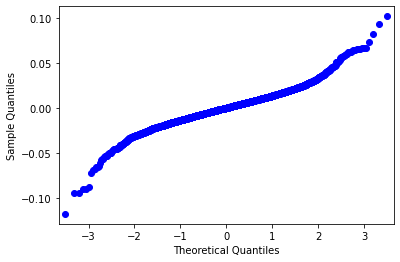

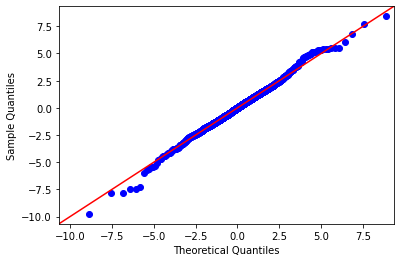

In [48]:
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats
fig = sm.qqplot(residuals)
fig2=sm.qqplot(residuals, stats.t, distargs=(4,),fit=True, line="45")
plt.show()

here we plot the residues of our model and as we see our model is far from a normal one but in t-students with 0.4 degree it has a good performance 

In [49]:
# Spot-Check Algorithms and evaluate each model in turn
models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
results = []
names = []
print(models)
for name, model in models:
    kfold = KFold(shuffle=True,random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


[('KNN', KNeighborsRegressor()), ('CART', DecisionTreeRegressor()), ('SVR', SVR())]
KNN: 0.855365 (0.010294)
CART: 0.899743 (0.008164)
SVR: 0.245735 (0.034827)


here we have three model KNeighborsRegressor(is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood), DecisionTreeRegressor (It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree) and support vector machine (The algorithm creates a line or a hyperplane which separates the data into classes) 
for making decision tht which of these three algoriyhm work better on our data we will calcute their accuracy and the result of it show us the CART model with 4% percentage is better than KNN and SVM has a lot distance with them.

In [50]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(shuffle=True ,random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledKNN: 0.877718 (0.006642)
ScaledCART: 0.897449 (0.007688)
ScaledSVR: 0.186052 (0.008736)


for making sure of our model we test the three of that with standardize data and the result will be the same . so we continue with CART

In [51]:
# CART Algorithm tuning
scoring = make_scorer(r2_score)
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),
              param_grid={'max_depth':range(2,10), 'min_samples_split': range(2, 15)},
              scoring=scoring, cv=5, refit=True)

g_cv.fit(X_train, Y_train)
g_cv.best_params_

{'max_depth': 9, 'min_samples_split': 14}

as we know GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters so here we use in in CART algoriyhm for find the best value of depth and sample_split of our tree 

In [52]:
# on the test or hold-out set
result = g_cv.cv_results_
r2_score(Y_test, g_cv.best_estimator_.predict(X_test))

0.9022085007924938

the accuracy show that the decision tree have good job on test data 

[Text(180.38087740384617, 206.56799999999998, 'X[29] <= 0.047\nmse = 0.002\nsamples = 21786\nvalue = 0.22'),
 Text(99.5882451923077, 184.824, 'X[21] <= 0.781\nmse = 0.001\nsamples = 14174\nvalue = 0.242'),
 Text(51.628413461538464, 163.07999999999998, 'X[21] <= 0.514\nmse = 0.001\nsamples = 3920\nvalue = 0.212'),
 Text(27.28298076923077, 141.336, 'X[0] <= 0.983\nmse = 0.001\nsamples = 2231\nvalue = 0.201'),
 Text(13.735384615384616, 119.592, 'X[18] <= 0.992\nmse = 0.001\nsamples = 1857\nvalue = 0.206'),
 Text(6.867692307692308, 97.848, 'X[27] <= 0.094\nmse = 0.001\nsamples = 822\nvalue = 0.194'),
 Text(3.433846153846154, 76.10399999999998, 'X[22] <= 0.952\nmse = 0.0\nsamples = 511\nvalue = 0.204'),
 Text(1.716923076923077, 54.360000000000014, 'X[30] <= 0.048\nmse = 0.0\nsamples = 469\nvalue = 0.202'),
 Text(0.8584615384615385, 32.615999999999985, 'X[37] <= 0.159\nmse = 0.0\nsamples = 5\nvalue = 0.12'),
 Text(0.42923076923076925, 10.872000000000014, 'mse = 0.0\nsamples = 2\nvalue = 0.14

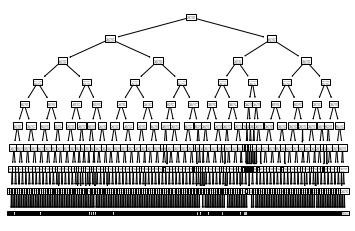

In [53]:
clf=DecisionTreeRegressor(max_depth=9,min_samples_split=2)
clf=clf.fit(X,Y)
tree.plot_tree(clf)

here we have tree plot by deep and the number of split that we choose

In [54]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


A learning curve shows the relationship of the training score versus the cross validated test score for an estimator with a varying number of training samples. This visualization is typically used to show two things:
1. How much the estimator benefits from more data (e.g. do we have “enough data” or will the estimator get better if used in an online fashion).
2. If the estimator is more sensitive to error due to variance vs. error due to bias.

the above code is a function that give us an opportunity that we can draw our plot:
    if i want to describe it to you first line tell us that if the variable that we use for plotting the curves is None then draw 3 plot in one column and by the value[0] we start our code we use ylim as our title and also we have 4 variable train_sizes, train_scores, test_scores, fit_times with the same input as our function.
    we also calcute the meand and std of train_scores, test_scores, fit_times for using them in ploting the learning curve 
    we have three kind of plot base on the lenght of axes that we want to draw them according to our model 

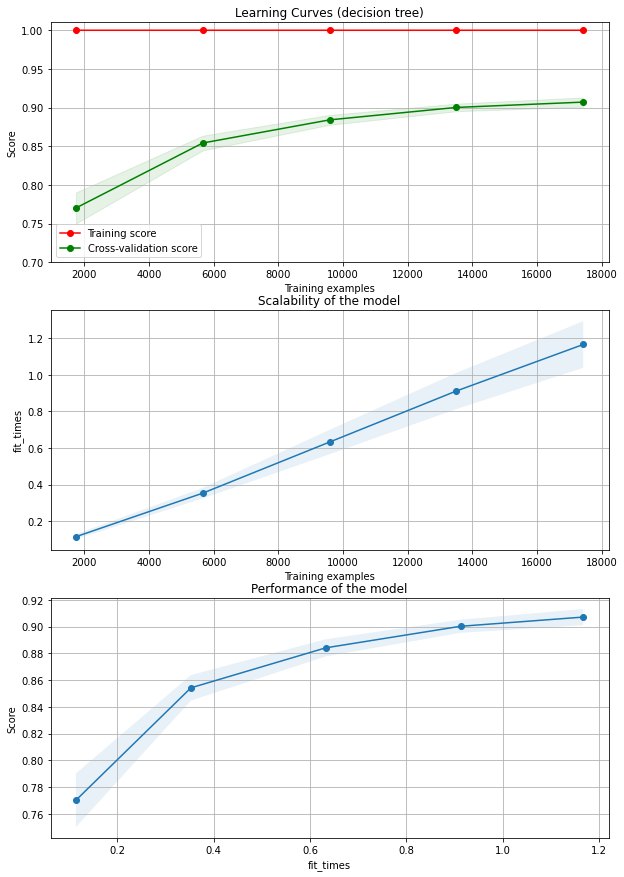

In [55]:

fig, axes = plt.subplots(3, figsize=(10, 15))
title = "Learning Curves (decision tree)"
# Cross validation with 10 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = DecisionTreeRegressor()
plot_learning_curve(
    estimator, title, X, Y, axes=axes[:], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)
plt.show()

the first plot show us that clearly the training score is still around the maximum and the validation score could be increased with more training samples.

The plots in the second row show the times required by the models to train with various sizes of training dataset.

The plots in the third row show how much time was required to train the models for each training sizes.

In [56]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: 0.747801 (0.011946)
ScaledGBM: 0.901821 (0.002824)
ScaledRF: 0.949619 (0.004357)
ScaledET: 0.958282 (0.002373)


as we know ensemles method is a machine learning technique that combines several base models in order to produce one optimal predictive model for thes models we use AdaBoostRegressor( a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction), GradientBoostingRegressor(GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.used when we want to decrease the Bias error), RandomForestRegressor (A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting) and ExtraTreesRegressor(This class implements a meta estimator that fits a number of randomized decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.) 
for see the result first of all we use cross validation that split into K number.

lets find the best parameters in our ensembels by xgboost method 

In [57]:
import xgboost
from xgboost import XGBRegressor
scoring = make_scorer(r2_score)
estimator= XGBRegressor()
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = scoring,
    cv = 10,
)
grid_search.fit(X_train, Y_train)
grid_search.best_estimator_



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=9, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=180, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

as we know XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. When using gradient boosting for regression, the weak learners are regression trees, and each regression tree maps an input data point to one of its leafs that contains a continuous score
base_score: The initial prediction score of all instances, global bias
booster:Which booster to use. Can be gbtree, gblinear or dart; gbtree and dart use tree based models while gblinear uses linear functions.
colsample_bylevel: is the subsample ratio of columns for each level. Subsampling occurs once for every new depth level reached in a tree. Columns are subsampled from the set of columns chosen for the current tree.
colsample_bynode:is the subsample ratio of columns for each node (split). Subsampling occurs once every time a new split is evaluated. Columns are subsampled from the set of columns chosen for the current level.
colsample_bytree: is the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.
gamma: Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.


In [59]:
# on the test or hold-out set
result = grid_search.cv_results_
r2_score(Y_test, grid_search.best_estimator_.predict(X_test))

0.9650500175013328

In [6]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2,4,6,8,10],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [2,4,6,8,10,12,14],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_searchrf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)                      
grid_searchrf.fit(X_train,Y_train)
grid_searchrf.best_estimator_

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits


RandomForestRegressor(max_depth=90, max_features=10, min_samples_leaf=3,
                      n_estimators=300)

In [8]:
# on the test or hold-out set
result = grid_searchrf.cv_results_
r2_score(Y_test, grid_searchrf.best_estimator_.predict(X_test))

0.9422368250392075

In [19]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [6,8,10],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [4,6,8,10],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = ExtraTreesRegressor()
# Instantiate the grid search model
grid_searchet = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
grid_searchet.fit(X_train,Y_train)
grid_searchet.best_estimator_                         
                          

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


ExtraTreesRegressor(bootstrap=True, max_depth=100, max_features=10,
                    min_samples_leaf=3, min_samples_split=6)

In [20]:
# on the test or hold-out set
result = grid_searchet.cv_results_
r2_score(Y_test, grid_searchet.best_estimator_.predict(X_test))

0.8546426600136792